# Experiment 2

Experiment 2 is about to mix half of the hard negative examples into our 100k standard dataset to evaluate the performance.

* [Training](#Training)
* [Evaluating](#Evaluating)
* [Plots](#Plots)

In [4]:
import sys
sys.path.append('..')

## Training

In [10]:
# Version 1

%run -i '../train.py' --dataset_name 'msmarco-passage/train/triples-small' --out_dir 'model_exp2' --batch_size 16 --mode 'BM25-Warm-Up' --train_steps 1e5

/home/jht412/anaconda3/envs/py310_20230225/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5.py:164: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


  0%|          | 0/100000.0 [00:00<?, ?it/s]

In [2]:
# Version 2 - Current

!accelerate launch '../train.py' --dataset_name 'msmarco-passage/train/triples-small' --out_dir 'model_exp2' --mode 'BM25-Warm-Up' --fraction 0.5

INFO:torch.distributed.distributed_c10d:Added key: store_based_barrier_key:1 to store for rank: 1
INFO:torch.distributed.distributed_c10d:Added key: store_based_barrier_key:1 to store for rank: 0
INFO:torch.distributed.distributed_c10d:Rank 0: Completed store-based barrier for key:store_based_barrier_key:1 with 2 nodes.
INFO:torch.distributed.distributed_c10d:Rank 1: Completed store-based barrier for key:store_based_barrier_key:1 with 2 nodes.
  0%|                        | 32/100000.0 [00:03<2:41:45, 10.30it/s, loss=1.06]INFO:torch.nn.parallel.distributed:Reducer buckets have been rebuilt in this iteration.
INFO:torch.nn.parallel.distributed:Reducer buckets have been rebuilt in this iteration.
100%|███████████████████▉| 99952/100000.0 [15:48<00:00, 105.35it/s, loss=0.0147]
100%|███████████████████▉| 99952/100000.0 [15:48<00:00, 105.40it/s, loss=0.0147]


## Evaluating

In [11]:
%run -i '../evaluate.py' --output_name '20230722' --batch_size 16 --exp 'exp2'

PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7

No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.


11:16:40.927 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1.9 GiB of memory would be required.


/home/jht412/MSc_Project/Experiments/evaluate.py:37: DeprecationWarning: specifying meta and meta_lengths in IterDictIndexer.index() is deprecated, use constructor instead
  indexref = iter_indexer.index(msmarco_generate(), meta={'docno' : 20, 'text': 4096})


11:17:11.168 [ForkJoinPool-1-worker-1] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (500080) - further warnings are suppressed
11:26:49.296 [ForkJoinPool-1-worker-1] WARN org.terrier.structures.indexing.Indexer - Indexed 5 empty documents
11:26:49.438 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1.9 GiB of memory would be required.


/home/jht412/anaconda3/envs/py310_20230225/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5.py:164: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
monoT5: 100%|████████████████████████| 12078/12078 [09:38<00:00, 20.88batches/s]


### Plots

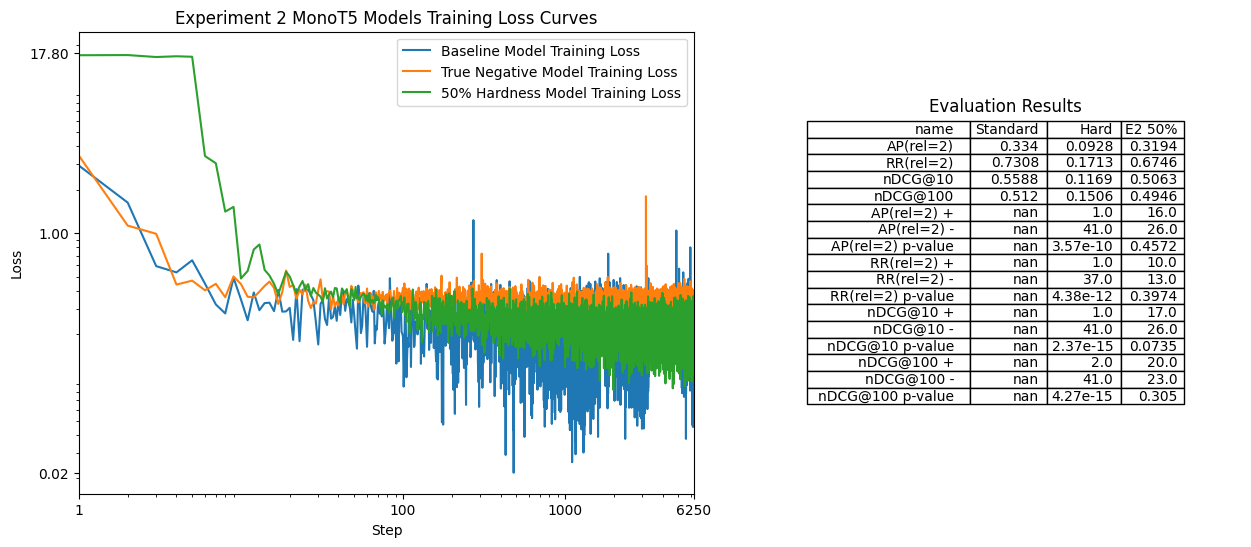

In [10]:
from utils import get_curves
import pandas as pd

result_df = pd.read_csv(f'results/test-2019_20230722_16-Copy.csv', index_col=0)
logs_paths = [
    '../Experiment_1/model_base', 
    '../Experiment_1/model_new',  
    '../Experiment_2/model_exp2/model_16_0.5'
]
labels = [
    'Baseline Model Training Loss',
    'True Negative Model Training Loss',
    '50% Hardness Model Training Loss'
]
get_curves(logs_paths, result_df, 'Experiment 2 MonoT5 Models Training', labels)